In [15]:
import pandas as pd

In [25]:
# Read the CSV files into Pandas dataframes
strikes_df = pd.read_csv('Zach_files/Notable_Strikes.csv')
unions_df = pd.read_csv('Zach_files/Labor_Union.csv')
edges_df = pd.read_csv('Zach_files/Labor_Join_Key.csv')



In [17]:
# Import necessary libraries for network visualization
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
strikes_df

,UID,Name,Unnamed: 2,Unnamed: 3,Industry,Unnamed: 5,Year of Strike,Unnamed: 7,Place,Unnamed: 9,# Dead,Unions Involved
0,GR1,The Great Railroad Strike,NaN,NaN,Railroad,NaN,1877,NaN,Several US Cities,NaN,100+,Workingmen's Party
1,SR1,Great Southwest Railroad Strike,NaN,NaN,Railroad,NaN,1886,NaN,Several US States,NaN,about 7,Knights of Labor
2,HA1,Haymarket Affair,NaN,NaN,Several,NaN,1886,NaN,Chicago,NaN,15,Knights of Labor
3,BV1,Bay View Massacre,NaN,NaN,Several,NaN,1886,NaN,Milwaukee,NaN,7,Knights of Labor
4,TM1,Thibodaux Massacre,NaN,NaN,Sugar,NaN,1887,NaN,"Thibodaux, LA",NaN,35-50,Knights of Labor
5,BH1,Battle of Homestead,NaN,NaN,Steel,NaN,1892,NaN,"Homestead, PA",NaN,10+,Amalgamated Association of Iron and Steel Workers
6,PS1,Pullman Strike,NaN,NaN,Railroad,NaN,1894,NaN,Chicago & Other States,NaN,70+,American Federation of Labor
7,LM1,Lattimer Massacre,NaN,NaN,Coal,NaN,1897,NaN,"Lattimer, PA",NaN,min. 19,United Mine Workers of America
8,LD1,Ludlow Massacre,NaN,NaN,Coal,NaN,1913,NaN,"Ludlow, CO",NaN,about 21,United Mine Workers of America
9,GS1,Great Steel Strike,NaN,NaN,Steel,NaN,1919,NaN,Nationwide,NaN,none,American Federation of Labor


In [22]:


# Assuming edges_df already exists and has the columns 'Strike_ID' and 'Org_ID'
# Check the structure of edges_df
print("Edges DataFrame columns:", edges_df.columns)
print(edges_df.head())  # Display the first few rows to verify the data

# Create a graph
G = nx.Graph()  # Use nx.DiGraph() if the edges are directed

# Add edges from edges_df
for index, row in edges_df.iterrows():
    G.add_edge(row['Strike_ID'], row['Org_ID'])  # Add edges using the columns

# Now G is your network object with edges
print("Number of nodes in the graph:", G.number_of_nodes())
print("Number of edges in the graph:", G.number_of_edges())

Edges DataFrame columns: Index(['Strike_ID', 'Org_ID'], dtype='object')
  Strike_ID Org_ID
0       GR1   WMP1
1       SR1   KLU1
2       HA1   KLU1
3       BV1   KLU1
4       TM1   KLU1
Number of nodes in the graph: 18
Number of edges in the graph: 12


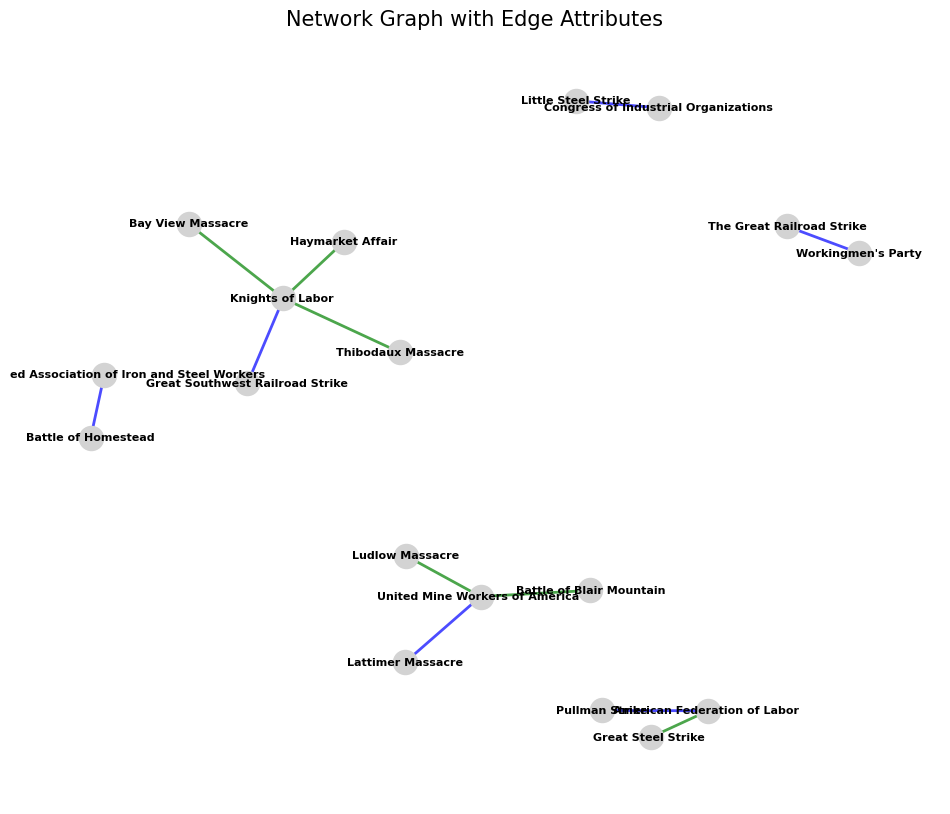

In [ ]:
# Draw the graph with improved visualization
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility

# Use a spring layout for better spacing
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust k for more space between nodes

# Define edge colors based on their type
edge_colors = []
for u, v in G.edges():
    if u in edges_df['Strike_ID'].values and v in edges_df['Org_ID'].values:
        edge_colors.append('blue')  # Color for edges connecting Strike_ID to Org_ID
    else:
        edge_colors.append('green')  # Color for other edges

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=300)  # Use a single color for nodes
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, alpha=0.7)  # Color edges based on their type
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'Name'), font_size=8, font_color='black', font_weight='bold')

# Set title and display the plot
plt.title("Network Graph with Edge Attributes", fontsize=15)
plt.axis('off')  # Turn off the axis
plt.show()

Edges DataFrame columns: Index(['Strike_ID', 'Org_ID'], dtype='object')
Unions DataFrame columns: Index(['UID', 'Name', 'Year Founded', 'Unnamed: 3', 'Unnamed: 4',
       'Current Status'],
      dtype='object')
UID NLU1 not found in graph nodes.


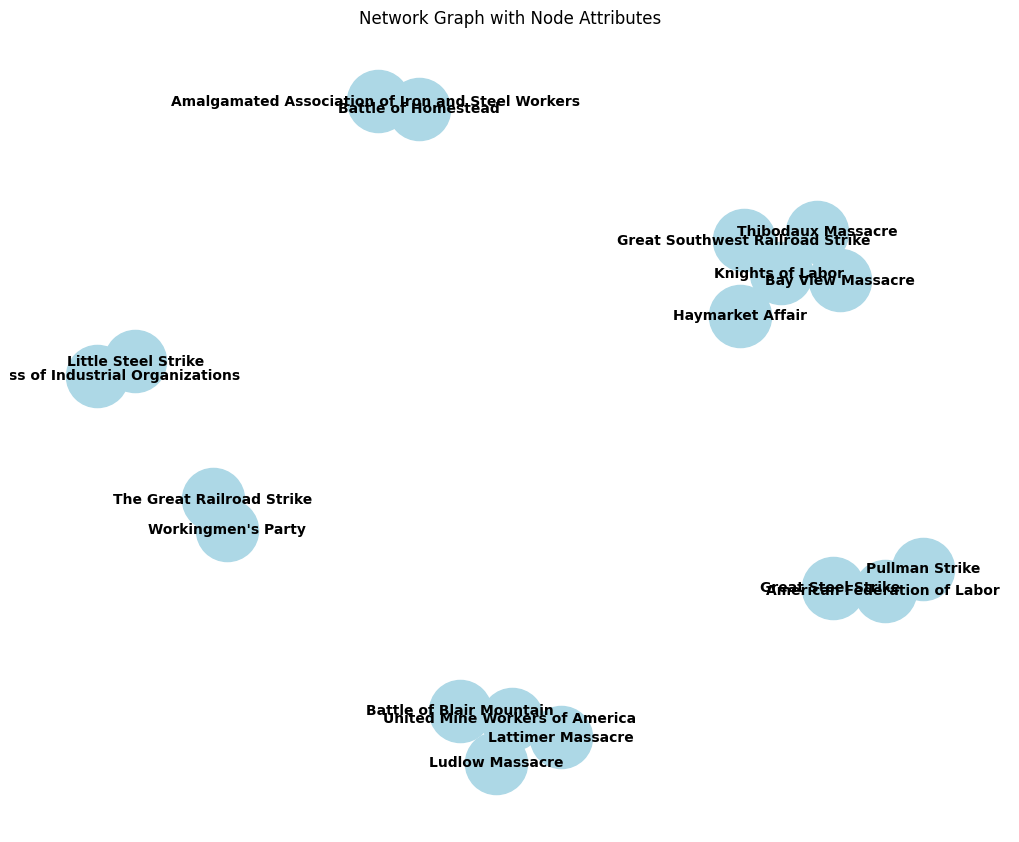

In [36]:
# Check column names
print("Edges DataFrame columns:", edges_df.columns)
print("Unions DataFrame columns:", unions_df.columns)

# Strip whitespace from column names if necessary
edges_df.columns = edges_df.columns.str.strip()
unions_df.columns = unions_df.columns.str.strip()

# Create a graph from edges_df
G = nx.from_pandas_edgelist(edges_df, 'Strike_ID', 'Org_ID', create_using=nx.Graph())

# Add attributes from unions_df to nodes in G
for index, row in unions_df.iterrows():
    uid = row['UID']  # Ensure this matches the actual column name in unions_df
    name = row['Name']  # Ensure this matches the actual column name in unions_df
    if uid in G.nodes:
        G.nodes[uid]['Name'] = name  # Add the 'Name' attribute to the node
    else:
        print(f"UID {uid} not found in graph nodes.")

# Add attributes from strikes_df to nodes in G (if needed)
for index, row in strikes_df.iterrows():
    uid = row['UID']  # Ensure this matches the actual column name in strikes_df
    name = row['Name']  # Ensure this matches the actual column name in strikes_df
    if uid in G.nodes:
        G.nodes[uid]['Name'] = name  # Add the 'Name' attribute to the node
    else:
        print(f"UID {uid} not found in graph nodes.")

# Draw the graph with node attributes
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'Name'), node_color='lightblue', node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color='gray')
plt.title("Network Graph with Node Attributes")
plt.show()

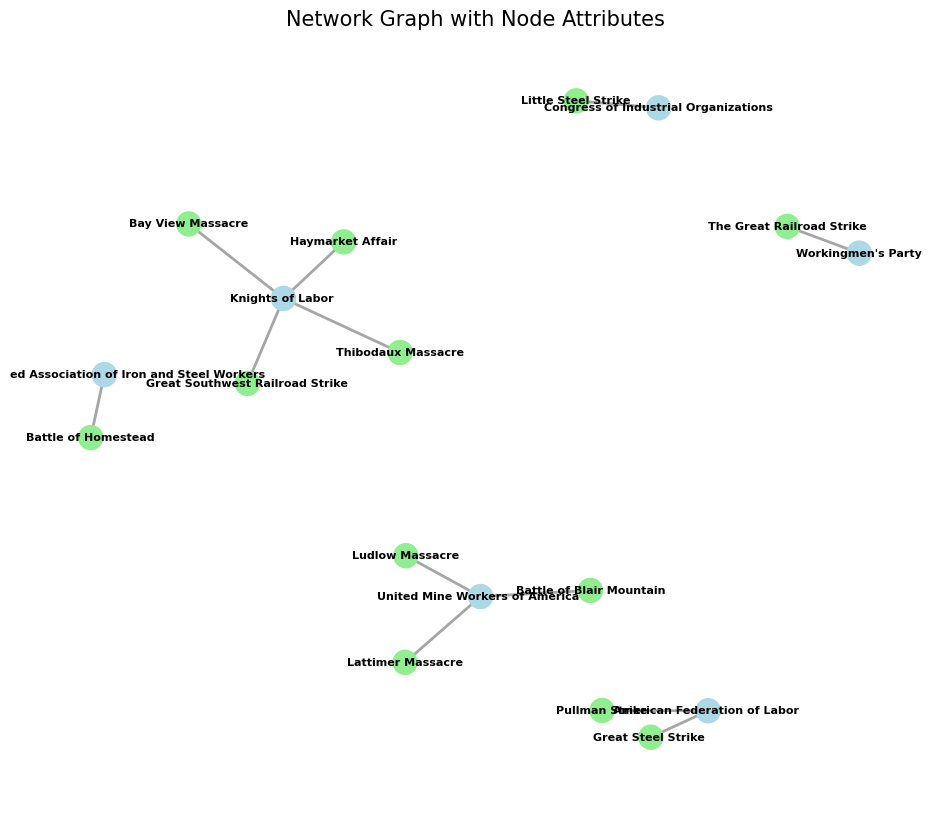

In [42]:
# Draw the graph with improved visualization
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility

# Use a spring layout for better spacing
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust k for more space between nodes

# Define node colors based on their type
node_colors = []
for node in G.nodes():
    if node in unions_df['UID'].values:
        node_colors.append('lightblue')  # Color for union nodes
    else:
        node_colors.append('lightgreen')  # Color for strike nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300)  # Color nodes based on their type
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')  # Use a single color for edges
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'Name'), font_size=8, font_color='black', font_weight='bold')

# Set title and display the plot
plt.title("Network Graph with Node Attributes", fontsize=15)
plt.axis('off')  # Turn off the axis
plt.show()